In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)
# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\darre\.cache\kagglehub\datasets\moltean\fruits\versions\63
Path to dataset files: C:\Users\darre\.cache\kagglehub\datasets\moltean\fruits\versions\63


In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

Print folder structure

In [ ]:
import os

print("Base path:", path)
print("\nMain folders:")

for item in os.listdir(path):
    print(item)


Base path: C:\Users\darre\.cache\kagglehub\datasets\moltean\fruits\versions\63

Main folders:
fruits-360_100x100
fruits-360_3-body-problem
fruits-360_dataset_meta
fruits-360_multi
fruits-360_original-size


In [ ]:
for split in os.listdir(path):
    split_path = os.path.join(path, split)
    
    if os.path.isdir(split_path):
        print(f"\nInside {split} folder:")
        classes = os.listdir(split_path)
        print("Number of classes:", len(classes))
        print("Sample classes:", classes[:10])



Inside fruits-360_100x100 folder:
Number of classes: 1
Sample classes: ['fruits-360']

Inside fruits-360_3-body-problem folder:
Number of classes: 1
Sample classes: ['fruits-360-3-body-problem']

Inside fruits-360_dataset_meta folder:
Number of classes: 1
Sample classes: ['fruits-360-meta']

Inside fruits-360_multi folder:
Number of classes: 3
Sample classes: ['LICENSE', 'README.md', 'test-multiple_fruits']

Inside fruits-360_original-size folder:
Number of classes: 1
Sample classes: ['fruits-360-original-size']


Image shape: (447, 399)
Class: Apple 10


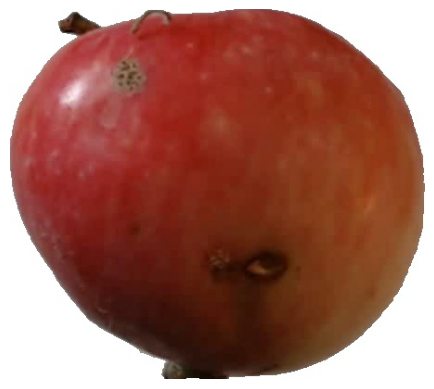

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

trainning_path = "fruits-360_original-size\\fruits-360-original-size\\Training"
testting_path  = "fruits-360_original-size\\fruits-360-original-size\\Test"

# Pick any class to test
sample_class = os.listdir(os.path.join(path, trainning_path))[0]
sample_folder = os.path.join(path, trainning_path, sample_class)

# Pick any image
sample_image = os.listdir(sample_folder)[0]
image_path = os.path.join(sample_folder, sample_image)

img = Image.open(image_path)
plt.imshow(img)
plt.axis("off")

print("Image shape:", img.size)
print("Class:", sample_class)


In [ ]:
# Create datasets
import tensorflow as tf

img_size = 224
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, trainning_path),
    image_size=(img_size, img_size),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, testting_path),
    image_size=(img_size, img_size),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Detected classes:", class_names)


Found 39368 files belonging to 111 classes.
Found 19570 files belonging to 111 classes.
Detected classes: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Core 1', 'Apple Red Yellow 2', 'Apple worm 1', 'Avocado Black 1', 'Avocado Black 2', 'Avocado Green 1', 'Banana 3', 'Banana 4', 'Beans 1', 'Blackberrie 1', 'Blackberrie 2', 'Blackberrie half rippen 1', 'Blackberrie not rippen 1', 'Cabbage red 1', 'Cactus fruit green 1', 'Cactus fruit red 1', 'Caju seed 1', 'Cherimoya 1', 'Cherry 3', 'Cherry 4', 'Cherry 5', 'Cherry Rainier 2', 'Cherry Rainier 3', 'Cherry Sour 1', 'Cherry Wax Red 2', 'Cherry Wax Red 3', 'Cherry Wax not ripen 1', 'Cherry Wax not ripen 2', 'Cucumber 1', 'Cucumber 10', 'Cucumber 11', 'Cucumber 3', 'Cucumber 4', 'Cucumber 5', 'Cucumber 6', 'Cucumber 7', 'Cucumber 8', 'Cucumber 9', 'Gooseberry 1', 'Grape not ripen 1', 'Nectarine Flat 2', 'Nut 1', 'Nut 2', 'Nut 3', 'Nut 4', 'Nu

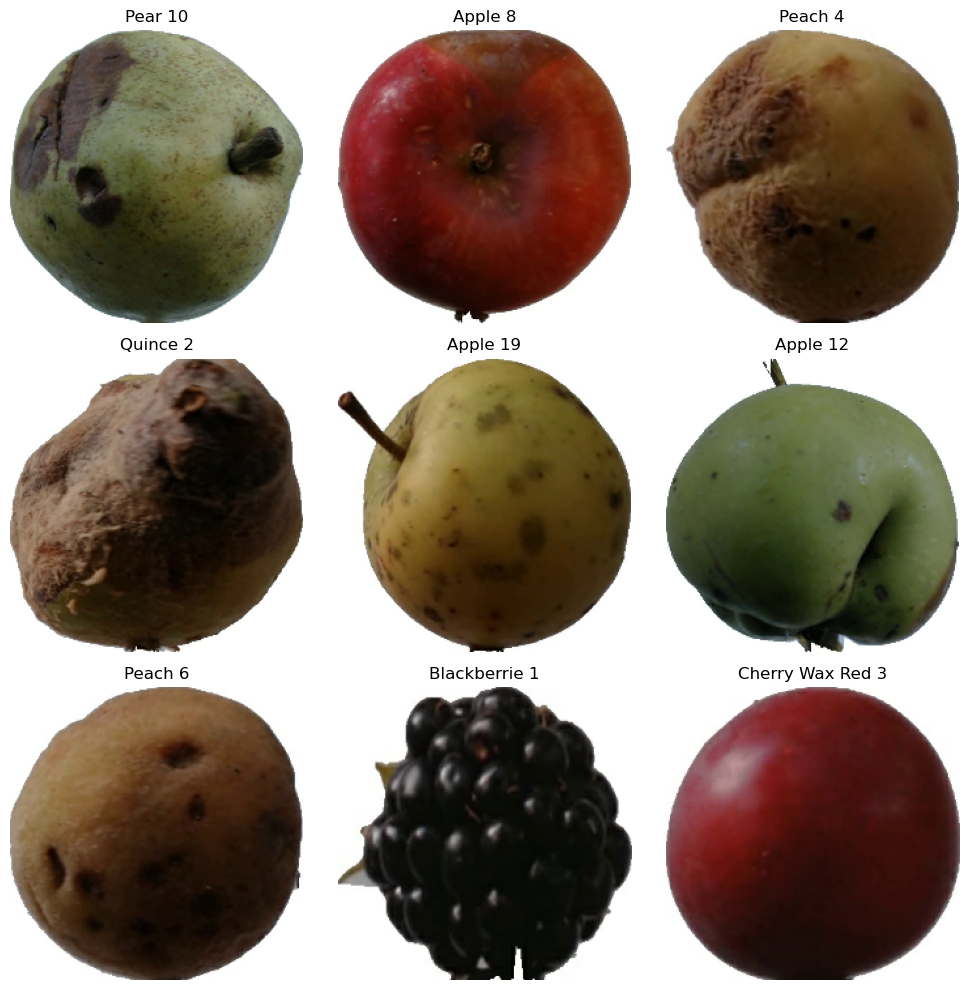

In [39]:
# Visualize some samples from the training dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.tight_layout()
plt.show()